### Import libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Import the data

In [103]:
file_path = r"C:\Users\PC\Desktop\Moringa\Phase_2\Group-5-phase-2-project\Data\kc_house_data.csv"
df = pd.read_csv(file_path)
df.head() #viewing the first 5 rows of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Conducting EDA

In [104]:
# Columns to drop
columns_to_drop = ['id','date', 'view','sqft_living','sqft_lot','floors','waterfront','sqft_above', 'sqft_basement', 
                   'yr_renovated','yr_built', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15']

# Drop the specified columns
house_df = df.drop(columns=columns_to_drop)

#filter rows with price < 1,000,000
filtered_house_df = house_df[ (house_df['price']< 1000000)]

# Display the first few rows to confirm the columns have been dropped
filtered_house_df.head()

,price,bedrooms,bathrooms,condition,grade,zipcode
0,221900.0,3,1.00,3,7,98178
1,538000.0,3,2.25,3,7,98125
2,180000.0,2,1.00,3,6,98028
3,604000.0,4,3.00,5,7,98136
4,510000.0,3,2.00,3,8,98074


In [105]:
#EDA and Data cleaning
print(f"NULL VALUES: {filtered_house_df.isna().sum()}")

# Display summary statistics
print(f"SUMMARY STATISTICS: {filtered_house_df.describe()}")

NULL VALUES: price        0
bedrooms     0
bathrooms    0
condition    0
grade        0
zipcode      0
dtype: int64
SUMMARY STATISTICS:                price      bedrooms     bathrooms     condition         grade  \
count   20107.000000  20107.000000  20107.000000  20107.000000  20107.000000   
mean   467124.140747      3.321729      2.038556      3.404635      7.503506   
std    195500.712454      0.906988      0.701973      0.645281      1.011387   
min     78000.000000      1.000000      0.500000      1.000000      3.000000   
25%    314000.000000      3.000000      1.500000      3.000000      7.000000   
50%    433200.000000      3.000000      2.000000      3.000000      7.000000   
75%    592225.000000      4.000000      2.500000      4.000000      8.000000   
max    999999.000000     33.000000      7.500000      5.000000     12.000000   

            zipcode  
count  20107.000000  
mean   98078.591684  
std       53.312865  
min    98001.000000  
25%    98033.000000  
50%    9806

In [106]:
#Check for duplicate rows
duplicates = filtered_house_df.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# View duplicate rows
duplicate_rows = filtered_house_df[duplicates]
duplicate_rows.head()

Number of duplicate rows: 600


,price,bedrooms,bathrooms,condition,grade,zipcode
1094,435000.0,3,2.50,3,7,98053
1544,365000.0,4,2.25,4,8,98058
1810,439000.0,4,2.25,3,8,98011
2194,360000.0,4,2.50,3,8,98038
2400,322500.0,4,2.50,3,7,98038


In [107]:
# Drop duplicate rows
filtered_cleaned_house_df = filtered_house_df.drop_duplicates()

# Verify the changes
print(f"Number of rows before dropping duplicates: {len(house_df)}")
print(f"Number of rows after dropping duplicates: {len(filtered_cleaned_house_df)}")

Number of rows before dropping duplicates: 21597
Number of rows after dropping duplicates: 19507


### Regression statsmodels. 

In [108]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'price~bedrooms+bathrooms+condition+grade+zipcode'
# create a fitted model in one line
model = smf.ols(formula=f, data= filtered_cleaned_house_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     2882.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:52:31   Log-Likelihood:            -2.6003e+05
No. Observations:               19507   AIC:                         5.201e+05
Df Residuals:                   19501   BIC:                         5.201e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.47e+07   2.01e+06    -22.205      0.000   -4.86e+07   -4.08e+07
bedrooms     1.54e+04   1346.754     11.434      0.000    1.28e+04     1.8e+04
bathrooms    2.77e+04   2089.025     13.260      0.000    2.36e+04    3.18e+04
condition   4.396e+04   1681.434     26.143      0.000    4.07e+04    4.73e+04
grade       1.125e+05   1332.867     84.426      0.000     1.1e+05    1.15e+05
zipcode      449.3114     20.508     21.909      0.000     409.113     489.509
==============================================================================
Omnibus:                      806.834   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.880
Skew:                           0.517   Prob(JB):                    2.64e-198
Kurtosis:                       3.227   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical variables. 
### plotting scatter plots to see the linearity of the scatter pots so as to identify cartegorical variables



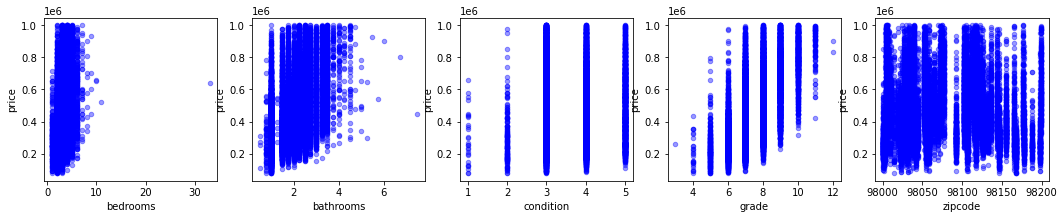

In [109]:
fig, axes = plt.subplots(nrows=1, ncols= 5, figsize=(18,3 ))

for xcol, ax in zip (['bedrooms','bathrooms','condition','grade','zipcode',],axes):
    filtered_cleaned_house_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='blue')


In [110]:
#now lets remove outliers using IQR 
columns_1= ['condition', 'zipcode']
df_final= filtered_cleaned_house_df.copy()

#calculating the 25th and 7th percentile
for column in columns_1:
    Q1 = df[column]. quantile(0.25)
    Q3 = df[column]. quantile(0.75) 
    IQR= Q3 - Q1  
    #define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

  # filter out the outliers for current column
    df_final= df_final[(df_final[column] >= lower_bound) & (df_final[column]<= upper_bound) ]


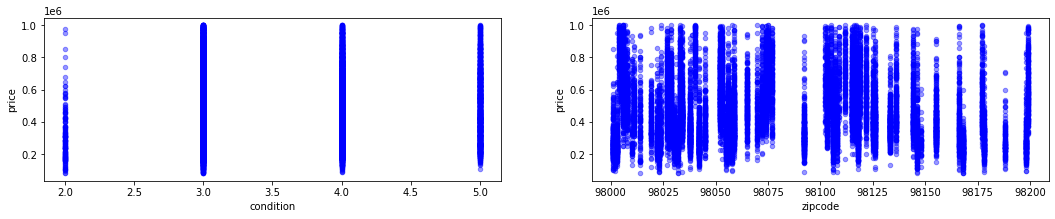

In [111]:
#plot the scatter plot to show outliers have been removed
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(18,3 ))

for xcol, ax in zip (['condition','zipcode',],axes):
    df_final.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='blue')

### since the scatter plots show no possibility of having a line of best fit, we convert these variables into cartegorical variables

In [112]:
#Now lets form dummies for the cartegorical variables.
condition_dummies= pd.get_dummies(df_final['condition'], prefix = 'cnd', drop_first=True)
zipcode_dummies= pd.get_dummies(df_final['zipcode'], prefix = 'zpc', drop_first=True)

In [113]:
#we then form a dataframe with the new columns
house_df_categorical= df_final.drop(['condition','zipcode','bedrooms','bathrooms','grade'], axis=1)
house_df_categorical= pd.concat ( [ house_df_categorical,condition_dummies, zipcode_dummies], axis=1)
house_df_categorical.head ()

,price,cnd_3,cnd_4,cnd_5,zpc_98002,zpc_98003,zpc_98004,zpc_98005,zpc_98006,zpc_98007,...,zpc_98146,zpc_98148,zpc_98155,zpc_98166,zpc_98168,zpc_98177,zpc_98178,zpc_98188,zpc_98198,zpc_98199
0,221900.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
house_df_categorical.columns[1:]


Index(['cnd_3', 'cnd_4', 'cnd_5', 'zpc_98002', 'zpc_98003', 'zpc_98004',
       'zpc_98005', 'zpc_98006', 'zpc_98007', 'zpc_98008', 'zpc_98010',
       'zpc_98011', 'zpc_98014', 'zpc_98019', 'zpc_98022', 'zpc_98023',
       'zpc_98024', 'zpc_98027', 'zpc_98028', 'zpc_98029', 'zpc_98030',
       'zpc_98031', 'zpc_98032', 'zpc_98033', 'zpc_98034', 'zpc_98038',
       'zpc_98039', 'zpc_98040', 'zpc_98042', 'zpc_98045', 'zpc_98052',
       'zpc_98053', 'zpc_98055', 'zpc_98056', 'zpc_98058', 'zpc_98059',
       'zpc_98065', 'zpc_98070', 'zpc_98072', 'zpc_98074', 'zpc_98075',
       'zpc_98077', 'zpc_98092', 'zpc_98102', 'zpc_98103', 'zpc_98105',
       'zpc_98106', 'zpc_98107', 'zpc_98108', 'zpc_98109', 'zpc_98112',
       'zpc_98115', 'zpc_98116', 'zpc_98117', 'zpc_98118', 'zpc_98119',
       'zpc_98122', 'zpc_98125', 'zpc_98126', 'zpc_98133', 'zpc_98136',
       'zpc_98144', 'zpc_98146', 'zpc_98148', 'zpc_98155', 'zpc_98166',
       'zpc_98168', 'zpc_98177', 'zpc_98178', 'zpc_98188', 'zpc

In [115]:
formula = 'price ~'+ '+' .join(house_df_categorical.columns[1:])
formula

'price ~cnd_3+cnd_4+cnd_5+zpc_98002+zpc_98003+zpc_98004+zpc_98005+zpc_98006+zpc_98007+zpc_98008+zpc_98010+zpc_98011+zpc_98014+zpc_98019+zpc_98022+zpc_98023+zpc_98024+zpc_98027+zpc_98028+zpc_98029+zpc_98030+zpc_98031+zpc_98032+zpc_98033+zpc_98034+zpc_98038+zpc_98039+zpc_98040+zpc_98042+zpc_98045+zpc_98052+zpc_98053+zpc_98055+zpc_98056+zpc_98058+zpc_98059+zpc_98065+zpc_98070+zpc_98072+zpc_98074+zpc_98075+zpc_98077+zpc_98092+zpc_98102+zpc_98103+zpc_98105+zpc_98106+zpc_98107+zpc_98108+zpc_98109+zpc_98112+zpc_98115+zpc_98116+zpc_98117+zpc_98118+zpc_98119+zpc_98122+zpc_98125+zpc_98126+zpc_98133+zpc_98136+zpc_98144+zpc_98146+zpc_98148+zpc_98155+zpc_98166+zpc_98168+zpc_98177+zpc_98178+zpc_98188+zpc_98198+zpc_98199'

In [116]:
from statsmodels.formula.api import ols
model= smf.ols(formula=formula, data = house_df_categorical).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     260.5
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:52:33   Log-Likelihood:            -2.5846e+05
No. Observations:               19479   AIC:                         5.171e+05
Df Residuals:                   19406   BIC:                         5.176e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.678e+05   1.31e+04     12.776      0.000    1.42e+05    1.93e+05
cnd_3       1.184e+05   1.09e+04     10.813      0.000    9.69e+04     1.4e+05
cnd_4       1.033e+05   1.11e+04      9.347      0.000    8.17e+04    1.25e+05
cnd_5       1.392e+05   1.15e+04     12.132      0.000    1.17e+05    1.62e+05
zpc_98002  -4.724e+04   1.26e+04     -3.759      0.000   -7.19e+04   -2.26e+04
zpc_98003   1.451e+04   1.14e+04      1.277      0.202   -7767.590    3.68e+04
zpc_98004   5.256e+05   1.44e+04     36.522      0.000    4.97e+05    5.54e+05
zpc_98005   4.504e+05    1.4e+04     32.284      0.000    4.23e+05    4.78e+05
zpc_98006   3.922e+05   1.05e+04     37.414      0.000    3.72e+05    4.13e+05
zpc_98007   3.093e+05   1.43e+04     21.665      0.000    2.81e+05    3.37e+05
zpc_98008   2.776e+05   1.15e+04     24.099      0.000    2.55e+05       3e+05
zpc_98010   1.411e+05    1.6e+04      8.831      0.000     1.1e+05    1.72e+05
zpc_98011   2.048e+05   1.27e+04     16.122      0.000     1.8e+05     2.3e+05
zpc_98014   1.472e+05   1.49e+04      9.910      0.000    1.18e+05    1.76e+05
zpc_98019   1.376e+05   1.29e+04     10.634      0.000    1.12e+05    1.63e+05
zpc_98022   3.386e+04   1.19e+04      2.840      0.005    1.05e+04    5.72e+04
zpc_98023   4942.5682   9880.139      0.500      0.617   -1.44e+04    2.43e+04
zpc_98024   1.972e+05   1.82e+04     10.859      0.000    1.62e+05    2.33e+05
zpc_98027   2.864e+05   1.04e+04     27.496      0.000    2.66e+05    3.07e+05
zpc_98028   1.708e+05   1.14e+04     15.006      0.000    1.48e+05    1.93e+05
zpc_98029   3.011e+05   1.12e+04     26.817      0.000    2.79e+05    3.23e+05
zpc_98030   1.578e+04   1.16e+04      1.355      0.175   -7047.285    3.86e+04
zpc_98031   1.886e+04   1.15e+04      1.645      0.100   -3615.584    4.13e+04
zpc_98032  -2.757e+04   1.48e+04     -1.867      0.062   -5.65e+04    1378.312
zpc_98033   3.469e+05   1.07e+04     32.286      0.000    3.26e+05    3.68e+05
zpc_98034   1.899e+05   9814.670     19.348      0.000    1.71e+05    2.09e+05
zpc_98038   8.285e+04   9661.141      8.575      0.000    6.39e+04    1.02e+05
zpc_98039   6.069e+05   6.32e+04      9.603      0.000    4.83e+05    7.31e+05
zpc_98040   5.366e+05   1.39e+04     38.708      0.000    5.09e+05    5.64e+05
zpc_98042   2.955e+04   9705.765      3.045      0.002    1.05e+04    4.86e+04
zpc_98045    1.38e+05   1.23e+04     11.254      0.000    1.14e+05    1.62e+05
zpc_98052   3.393e+05   9669.662     35.085      0.000     3.2e+05    3.58e+05
zpc_98053   3.364e+05   1.06e+04     31.776      0.000    3.16e+05    3.57e+05
zpc_98055   2.264e+04   1.15e+04      1.966      0.049      72.560    4.52e+04
zpc_98056    1.21e+05   1.04e+04     11.670      0.000    1.01e+05    1.41e+05
zpc_98058   7.005e+04   1.01e+04      6.941      0.000    5.03e+04    8.98e+04
zp

## multicollinearity features

In [117]:
house_df_categorical.corr()['price']

price        1.000000
cnd_3        0.021141
cnd_4       -0.034601
cnd_5        0.045896
zpc_98002   -0.120662
               ...   
zpc_98177    0.045671
zpc_98178   -0.096604
zpc_98188   -0.076589
zpc_98198   -0.104923
zpc_98199    0.097554
Name: price, Length: 73, dtype: float64

In [125]:
house_df_categorical.corr()[abs(house_df_categorical.corr()['price']) > 0.1]

,price,cnd_3,cnd_4,cnd_5,zpc_98002,zpc_98003,zpc_98004,zpc_98005,zpc_98006,zpc_98007,...,zpc_98146,zpc_98148,zpc_98155,zpc_98166,zpc_98168,zpc_98177,zpc_98178,zpc_98188,zpc_98198,zpc_98199
price,1.000000,0.021141,-0.034601,0.045896,-0.120662,-0.105081,0.140353,0.113993,0.145450,0.050567,...,-0.077742,-0.049276,-0.052256,-0.027584,-0.133595,0.045671,-0.096604,-0.076589,-0.104923,0.097554
zpc_98002,-0.120662,-0.057966,0.055214,0.015419,1.000000,-0.011944,-0.008274,-0.008648,-0.014031,-0.008369,...,-0.011900,-0.005302,-0.015090,-0.011255,-0.011605,-0.010846,-0.011559,-0.008401,-0.012011,-0.011443
zpc_98003,-0.105081,-0.000742,0.017815,-0.026104,-0.011944,1.000000,-0.009774,-0.010215,-0.016574,-0.009886,...,-0.014056,-0.006263,-0.017825,-0.013295,-0.013707,-0.012811,-0.013653,-0.009923,-0.014188,-0.013516
zpc_98004,0.140353,-0.038727,0.046342,-0.007289,-0.008274,-0.009774,1.000000,-0.007076,-0.011481,-0.006848,...,-0.009737,-0.004338,-0.012348,-0.009210,-0.009496,-0.008875,-0.009458,-0.006874,-0.009828,-0.009363
zpc_98005,0.113993,-0.050577,0.046767,0.011232,-0.008648,-0.010215,-0.007076,1.000000,-0.011999,-0.007157,...,-0.010176,-0.004534,-0.012905,-0.009625,-0.009924,-0.009275,-0.009885,-0.007184,-0.010272,-0.009786
zpc_98006,0.145450,-0.073654,0.061588,0.032820,-0.014031,-0.016574,-0.011481,-0.011999,1.000000,-0.011613,...,-0.016512,-0.007357,-0.020939,-0.015617,-0.016102,-0.015050,-0.016038,-0.011657,-0.016666,-0.015878
zpc_98023,-0.150190,-0.019810,0.040128,-0.035994,-0.015984,-0.018880,-0.013079,-0.013669,-0.022178,-0.013229,...,-0.018809,-0.008381,-0.023853,-0.017790,-0.018343,-0.017144,-0.018270,-0.013278,-0.018986,-0.018087
zpc_98031,-0.100504,-0.022915,0.030268,-0.005448,-0.011764,-0.013896,-0.009626,-0.010061,-0.016324,-0.009737,...,-0.013844,-0.006168,-0.017556,-0.013094,-0.013501,-0.012618,-0.013447,-0.009773,-0.013974,-0.013312
zpc_98033,0.107455,-0.036387,0.029196,0.016563,-0.013302,-0.015713,-0.010885,-0.011376,-0.018458,-0.011010,...,-0.015654,-0.006975,-0.019851,-0.014806,-0.015266,-0.014268,-0.015205,-0.011051,-0.015801,-0.015053
zpc_98040,0.152711,-0.071125,0.068015,0.012833,-0.008739,-0.010322,-0.007151,-0.007473,-0.012126,-0.007233,...,-0.010283,-0.004582,-0.013041,-0.009726,-0.010029,-0.009373,-0.009989,-0.007260,-0.010380,-0.009889
